In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')
warnings.simplefilter(action='ignore', category=FutureWarning)

### 5

In [2]:
# Load dataset
default = pd.read_csv('../../data/Default.csv')
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [3]:
# Create X and y matrices
X = default[['income', 'balance']]
y = default['default']

In [4]:
# Fit logistic regression
clf = LogisticRegression(solver = 'liblinear')
model = clf.fit(X, y)
y_pred = model.predict(X)

print(f'Logit Test Error: {1-accuracy_score(y,y_pred)}')

Logit Test Error: 0.03359999999999996


In [5]:
# Repeat using validation set approach

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = LogisticRegression(solver = 'liblinear')
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Test Error: {1-accuracy_score(y_test,y_pred)}')

Test Error: 0.038799999999999946


In [6]:
# Repeat using K fold cross validation 
from sklearn.model_selection import KFold 

k=3
kf =  KFold(n_splits=k, random_state = None)
model = LogisticRegression(solver = 'liblinear')

acc_score = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    pred_values = model.predict(X_test)
    
    acc = accuracy_score(pred_values, y_test)
    acc_score.append(acc)
    
avg_acc_score = sum(acc_score)/k

print(f'accuracy of each fold : {acc_score}')
print(f'Avg accuracy : {avg_acc_score}')

accuracy of each fold : [0.9646070785842832, 0.9672967296729673, 0.966996699669967]
Avg accuracy : 0.9663001693090726


In [7]:
# Now repeat while adding new dummy for student
default['student_dummy'] = [1 if val == 'Yes' else 0 for val in default.student]

# Create X and y matrices
X = default[['income', 'balance', 'student_dummy']]
y = default['default']

In [8]:
# Run 3-fold cross validation
k=3
kf =  KFold(n_splits=k, random_state = None)
model = LogisticRegression(solver = 'liblinear')

acc_score = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    pred_values = model.predict(X_test)
    
    acc = accuracy_score(pred_values, y_test)
    acc_score.append(acc)
    
avg_acc_score = sum(acc_score)/k

print(f'accuracy of each fold : {acc_score}')
print(f'Avg accuracy : {avg_acc_score}')

accuracy of each fold : [0.9646070785842832, 0.9672967296729673, 0.966996699669967]
Avg accuracy : 0.9663001693090726


### 7

In [9]:
# Load dataset
weekly = pd.read_csv('../../data/Weekly.csv')

weekly['Direction_dummy'] = [1 if val == "Up" else 0 for val in weekly.Direction]
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction_dummy
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,1


In [10]:
# Fit logistic regression 
X = weekly[['Lag1', 'Lag2']]
y = weekly['Direction_dummy']

clf = LogisticRegression(solver = 'liblinear')
model = clf.fit(X, y)

In [50]:
# Fit logistic regression leaving first observation out
i = 1
X_train = X.drop(X.index[i])
y_train = y.drop(y.index[i])

X_test = np.array(X.iloc[i,:])
X_test = X_test.reshape(1,-1)

y_test = np.array(y[i])

model  = clf.fit(X_train, y_train)
pred = model.predict(X_test)

if pred != y_test:
    error = 1
else:
    error = 0
error

1

In [54]:
# For loop to run the above logistic regression using leave one out cross-val
errors = []

for i,row in X.iterrows():
    X_train = X.drop(X.index[i])
    y_train = y.drop(y.index[i])

    X_test = np.array(X.iloc[i,:])
    X_test = X_test.reshape(1,-1)

    y_test = np.array(y[i])

    model  = clf.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    if pred != y_test:
        error = 1
    else:
        error = 0
    
    errors.append(error)
    
np.mean(errors)

0.44995408631772266

### 8 

Text(0, 0.5, 'Y')

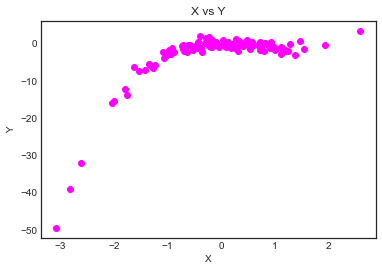

In [89]:
import random

# Create dataset
random.seed(1)
x = np.random.normal(loc=0,scale=1,size=100)
y = (x-2) * (x**2) + np.random.normal(loc=0,scale=1,size=100)

# Plot data
fig,ax = plt.subplots(1,1)
plt.scatter(x,y, color = 'magenta')
ax.set_title('X vs Y')
ax.set_xlabel('X')
ax.set_ylabel('Y')

In [90]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

data = pd.DataFrame(data = {'X': x, 'y': y})
data['X2'] = x**2
data['X3'] = x**3
data['X4'] = x**4

loo = LeaveOneOut()

In [92]:
# Model 1: y ~ X
random.seed(10)
X = data['X']
y = data['y']

errors = []
for train_index, test_index in loo.split(data):
    
    X_train, X_test = np.array(X[train_index]), np.array(X[test_index])
    y_train, y_test = np.array(y[train_index]), np.array(y[test_index])
    
    X_test = X_test.reshape(1,-1)
    y_test = y_test.reshape(1,-1)
    
    X_train = X_train.reshape(-1,1)
    y_train = y_train.reshape(-1,1)
    
    #print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    
    lm = LinearRegression()
    model = lm.fit(X_train, y_train)
    pred = model.predict(X_test)
    error = mean_squared_error(y_test, pred)   
    
    errors.append(error)    
    
np.mean(errors)

35.15775382605807

In [96]:
# Model 2: y ~ X + X^2
X = data[['X', 'X2']]
y = data['y']

errors = []
for train_index, test_index in loo.split(data):
    
    X_train, X_test = np.array(X.iloc[train_index,:]), np.array(X.iloc[test_index,:])
    y_train, y_test = np.array(y[train_index]), np.array(y[test_index])
    
    X_test = X_test.reshape(1,-1)
    y_test = y_test.reshape(1,-1)
    
    #X_train = X_train.reshape(-1,1)
    #y_train = y_train.reshape(-1,1)
    
    lm = LinearRegression()
    model = lm.fit(X_train, y_train)
    pred = model.predict(X_test)
    error = mean_squared_error(y_test, pred)   
    
    errors.append(error)    
    
np.mean(errors)

12.827869503377446

In [97]:
# Model 3: y ~ X + X^2 + X^3
X = data[['X', 'X2', 'X3']]
y = data['y']

errors = []
for train_index, test_index in loo.split(data):
    
    X_train, X_test = np.array(X.iloc[train_index,:]), np.array(X.iloc[test_index,:])
    y_train, y_test = np.array(y[train_index]), np.array(y[test_index])
    
    X_test = X_test.reshape(1,-1)
    y_test = y_test.reshape(1,-1)
    
    #X_train = X_train.reshape(-1,1)
    #y_train = y_train.reshape(-1,1)
    
    lm = LinearRegression()
    model = lm.fit(X_train, y_train)
    pred = model.predict(X_test)
    error = mean_squared_error(y_test, pred)   
    
    errors.append(error)    
    
np.mean(errors)

0.9919319858622389

In [98]:
# Model 2: y ~ X + X^2 + X^3 + X^4
X = data[['X', 'X2', 'X3', 'X4']]
y = data['y']

errors = []
for train_index, test_index in loo.split(data):
    
    X_train, X_test = np.array(X.iloc[train_index,:]), np.array(X.iloc[test_index,:])
    y_train, y_test = np.array(y[train_index]), np.array(y[test_index])
    
    X_test = X_test.reshape(1,-1)
    y_test = y_test.reshape(1,-1)
    
    #X_train = X_train.reshape(-1,1)
    #y_train = y_train.reshape(-1,1)
    
    lm = LinearRegression()
    model = lm.fit(X_train, y_train)
    pred = model.predict(X_test)
    error = mean_squared_error(y_test, pred)   
    
    errors.append(error)    
    
np.mean(errors)

0.9845255476486239